<a href="https://colab.research.google.com/github/joshtype/Algorithms/blob/main/Algo10_BFS_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Algo-W01-10 Group
# Algorithm Analysis Fall 2025 Group Project
# Comparative Analysis Graph Traversal Techniques: BFS vs DFS

In [ ]:
from collections import deque, defaultdict  # FIFO queue & dict for traversal
import random                               # for randomized graph data
import time                                 # for time measurement

In [ ]:
""" Creates randomized, undirected, unweighted graph objects. """
class RUNGraph:
  def __init__(self, edge_prob):
    """ Create RUN_Graph object with randomly populated nodes, values, edges. """
    self.num_nodes = random.randint(250, 3001)  # number nodes over a wide range
    self.nodes = list(range(self.num_nodes))    # node value == index position
    self.edge_prob = edge_prob                  # 3%, 6%, or 15% edge chance
    self.edges = self.set_edges()               # set of graph adjacencies
    self.start_node = self.nodes[0]             # initial state = first node
    self.goal_node = self.set_goal_node()       # goal state = random node

  ### DEFINE EDGES
  def set_edges(self):
    """ Generate edges according to self.edge_prob. """
    edges = set()
    for i in range(self.num_nodes):
      for j in range(i + 1, self.num_nodes):
        if random.random() < self.edge_prob:  # create edge as a tuple, add to set
          edge = (min(self.nodes[i], self.nodes[j]), max(self.nodes[i], self.nodes[j]))
          edges.add(edge)
    return edges

  ### SET GOAL NODE
  def set_goal_node(self):
    """ Defines goal state to a random node that is not the starting node. """
    return random.choice([node for node in self.nodes if node != self.start_node])

  ### GET LIST OF ADJACENCIES
  def get_adj_list(self):
    """ Generate list of adjacencies from set of edges. """
    adj = defaultdict(list)
    for u, v in self.edges:
      adj[u].append(v)  # add adj for u -> v
      adj[v].append(u)  # add adj for v -> u    *per undirected graph
    return adj

  ### PRINT GRAPH ATTRIBUTES
  def attributes(self):
    print("---------------------------")
    print(f"Number of nodes: {self.num_nodes}")
    print(f"Number of edges: {len(self.edges)}")
    print(f"Edge probability: {self.edge_prob * 100:.2f}%")
    print(f"Start node = {self.start_node}")
    print(f"goal node = {self.goal_node}")
    print("---------------------------")


  ### BFS SHORTEST PATH
  def bfs(self):
    """ BFS traversal of graph from start node to goal node via queue.
    @return: (list) nodes along traversal path. """

    adj = self.get_adj_list()  # graph represented via list of adjacent nodes
    seen = set()               # visited nodes to prevent cycling

    q = deque([(self.start_node, [self.start_node])])  # queue = tupled start, list of adj nodes
    max_q = 0   # tracker for maximum queue size

    while q:                        # while state nodes remain in queue
      max_q = max(max_q, len(q))    # store queue size at max to return
      current, path = q.popleft()   # pop first (leftmost) per FIFO

      if current == self.goal_node:  # compare state to goal state
        return path, max_q           # if goal, return path & max queue size

      seen.add(current)              # if not, add to seen at enqueueing

      for neighbor in adj[current]:  # explore next sibling before descending
        if neighbor not in seen:
          q.append((neighbor, path + [neighbor]))
          seen.add(neighbor)

    print("Cannot find a path from start node to goal node.")  # paths exhausted
    return [], max_q  # return empty path list

  ### ITERATIVE DFS SHORTEST PATH
  def idfs(self):
    """ Iterative DFS traversal from start node to goal node via stack.
    @return: (list) nodes along traversal path. """

    adj = self.get_adj_list()
    seen = set()

    s = [(self.start_node, [self.start_node])]  # stack = tuple of (start, list of adj nodes)
    max_s = 0   # tracker for maximum stack size

    while s:
      max_s = max(max_s, len(s))   # store max stack size to return
      current, path = s.pop()      # pop last (rightmost) per LIFO

      if current == self.goal_node:
        return path, max_s

      if current not in seen:      # check seen nodes before pushing
        seen.add(current)

        for neighbor in reversed(adj[current]):  # reversed for consistent ordering
          if neighbor not in seen:
            s.append((neighbor, path + [neighbor]))

    print("Cannot find a path from start node to goal node.")
    return [], max_s

In [ ]:
# Time measurement
class Timer:
  """ Measures time execution for BFS and iDFS traversals. """
  @staticmethod
  def clock(func):
    start = time.perf_counter()
    result = func()
    end = time.perf_counter()
    elapsed = end - start
    return result, elapsed

In [ ]:
### Driver UI
def main():
  explainer = """\n[PROGRAM EXPLANATION]
  Purpose:
    To compare graph traversal performance of breadth-first search (BFS) to
    iterative depth-first search (iDFS). Specifically, path length, memory
    (BFS queue size vs iDFS stack size), and time taken.

  Graphs:
    Unweighted, undirected, randomly populated. Number of nodes = [250, 3000].
    Number of edges = randomly determined via edge probability.

    Three graphs are created each run to simulate varying densities:
      1. Sparse graph = 0.03 edge probability (3%).
      2. Medium graph = 0.06 edge probability (6%).
      3. Dense graph = 0.12 edge probability (12%)."""

  spa = med = den = None  # initialize graphs to null

  while (True):
    choice = menu_helper()

    if choice == 0:    # explanation
      print(explainer)

    if choice == 1:    # create each graph
      print("\n[CREATE GRAPHS]")
      print("Creating graphs...")
      spa = RUNGraph(0.03)  # sparse graph = 0.03 edge prob
      med = RUNGraph(0.06)  # medium graph = 0.06 edge prob
      den = RUNGraph(0.12)  # dense graph = 0.12 edge prob

      print("\nSparse graph:")
      spa.attributes()
      print("\nMedium graph:")
      med.attributes()
      print("\nDense graph:")
      den.attributes()

    elif choice == 2:    # reprint attributes
      if not spa or not med or not den:
        print("\nError: must first create graphs via menu option 1.")
      else:
        print("\n[REPRINT GRAPH ATTRIBUTES]")
        print("Sparse graph:")
        spa.attributes()
        print("\nMedium graph:")
        med.attributes()
        print("\nDense graph:")
        den.attributes()

    elif choice == 3:    # run bfs & idfs on each graph
      if not spa or not med or not den:
        print("\nError: must first create graphs via menu option 1.")
      else:
        print("\n[BFS & iDFS GRAPH TRAVERSALS]")
        print("Starting traversals...")

        result, spa_bfs_time = Timer.clock(spa.bfs)  # invoke bfs on each graph within Timer wrapper
        spa_bfs_path, spa_bfs_max = result             # unpack returned tuple

        result, med_bfs_time = Timer.clock(med.bfs)
        med_bfs_path, med_bfs_max = result

        result, den_bfs_time = Timer.clock(den.bfs)
        den_bfs_path, den_bfs_max = result

        result, spa_idfs_time = Timer.clock(spa.idfs)  # invoke idfs on each graph within Timer wrapper
        spa_idfs_path, spa_idfs_max = result             # unpack tuple

        result, med_idfs_time = Timer.clock(med.idfs)
        med_idfs_path, med_idfs_max = result

        result, den_idfs_time = Timer.clock(den.idfs)
        den_idfs_path, den_idfs_max = result

        print("Finished.")

    elif choice == 4:   # compare metrics (path len, que v stack size, time)
      if not spa or not med or not den:
        print("\nError: must first create graphs via menu option 1.")
      elif not all([spa_bfs_path, spa_idfs_path, med_bfs_path, med_idfs_path, den_bfs_path, den_idfs_path]):
        print("\nError: must first run traversals via menu option 3.")  # verify traversals exist
      else:
        print("\n[COMPARE TRAVERSAL METRICS]")
        print("Retrieving metrics...")

        print("\nSparse graph:")  # print path len, queue/stack size, time from Time wrapper
        print(f"Path length: BFS = {len(spa_bfs_path)} vs. iDFS = {len(spa_idfs_path)}.")
        print(f"Memory: BFS queue size = {spa_bfs_max} vs. iDFS stack size = {spa_idfs_max}.")
        print(f"Time Taken: BFS = {spa_bfs_time:.6f} sec vs. iDFS = {spa_idfs_time:.6f} sec.")

        print("\nMedium graph:")
        print(f"Path length: BFS = {len(med_bfs_path)} vs. iDFS = {len(med_idfs_path)}.")
        print(f"Memory: BFS queue size = {med_bfs_max} vs. iDFS stack size = {med_idfs_max}.")
        print(f"Time Taken: BFS = {med_bfs_time:.6f} sec vs. iDFS = {med_idfs_time:.6f} sec.")

        print("\nDense graph:")
        print(f"Path length: BFS = {len(den_bfs_path)} vs. iDFS = {len(den_idfs_path)}.")
        print(f"Memory: BFS queue size = {den_bfs_max} vs. iDFS stack size = {den_idfs_max}.")
        print(f"Time Taken: BFS = {den_bfs_time:.6f} sec vs. iDFS = {den_idfs_time:.6f} sec.")

    elif choice == 5:    # exit
      print("\nExiting program... Goodbye.")
      return

### HELPER FUNCTION FOR main()
def menu_helper():
  menu = """\n[BFS vs iDFS TRAVERSAL MENU]
  0. Explain program
  1. Create each graph
  2. Reprint attributes for graphs
  3. Traverse graphs via BFS & iDFS
  4. Compare metrics (path length, memory via BFS queue vs iDFS stack size, time)
  5. Exit program"""

  while (True):
    print(menu)
    try:
      choice = int(input("Enter a menu option: "))
      if 0 <= choice <= 6:
        return choice
    except ValueError:
      print("\nError: invalid input. Enter a valid menu option, 0-6.")

In [ ]:
# Execute
if __name__ == '__main__':
  main()


[BFS vs iDFS TRAVERSAL MENU]
  0. Explain program
  1. Create each graph
  2. Reprint attributes for graphs
  3. Traverse graphs via BFS & iDFS
  4. Compare metrics (path length, memory via BFS queue vs iDFS stack size, time)
  5. Exit program
Enter a menu option: 1

[CREATE GRAPHS]
Creating graphs...

Sparse graph:
---------------------------
Number of nodes: 2693
Number of edges: 108805
Edge probability: 3.00%
Start node = 0
goal node = 559
---------------------------

Medium graph:
---------------------------
Number of nodes: 1714
Number of edges: 88087
Edge probability: 6.00%
Start node = 0
goal node = 759
---------------------------

Dense graph:
---------------------------
Number of nodes: 2677
Number of edges: 429308
Edge probability: 12.00%
Start node = 0
goal node = 1258
---------------------------

[BFS vs iDFS TRAVERSAL MENU]
  0. Explain program
  1. Create each graph
  2. Reprint attributes for graphs
  3. Traverse graphs via BFS & iDFS
  4. Compare metrics (path length, 

Saved PNGs: runtime_vs_size.png, peak_frontier_vs_size.png, path_lengths.png


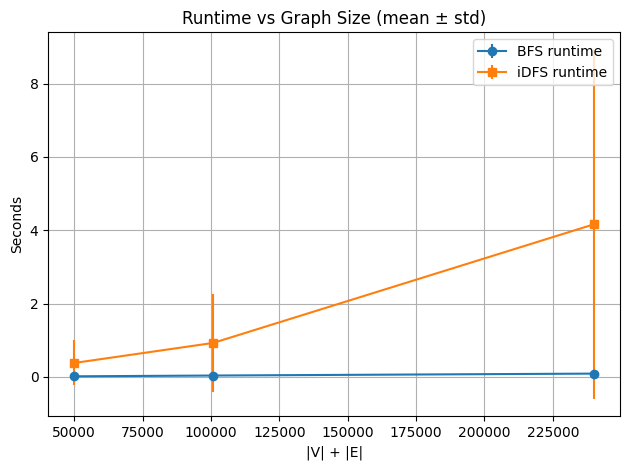

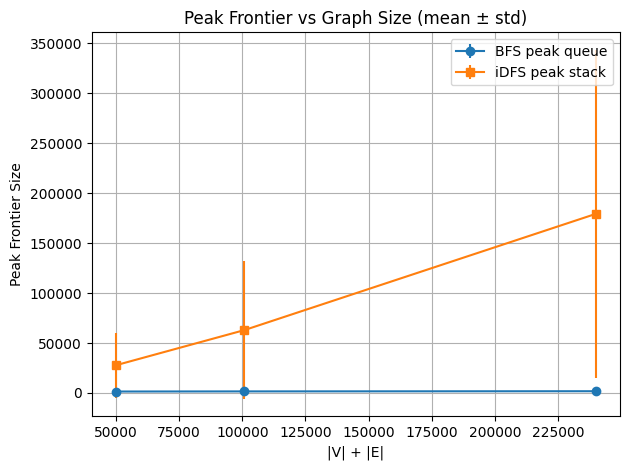

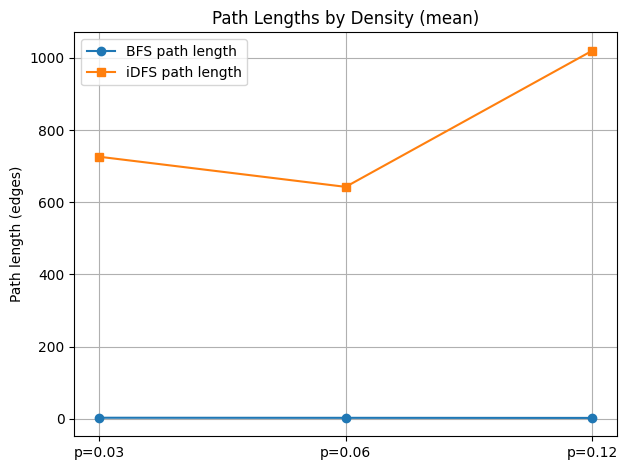

In [ ]:
# BFS vs iDFS:
import time, numpy as np, matplotlib.pyplot as plt
from collections import defaultdict

def _count_edges_from_graph(g):
    if hasattr(g, "edges"):
        return len(g.edges)
    adj = g.get_adj_list()        # fallback if edges aren't stored
    vals = adj.values() if isinstance(adj, dict) else adj
    return sum(len(v) for v in vals) // 2

def _measure_once(p):
    g = RUNGraph(p)

    t0 = time.perf_counter()
    bfs_path, bfs_peak = g.bfs()
    bfs_time = time.perf_counter() - t0

    t0 = time.perf_counter()
    idfs_path, idfs_peak = g.idfs()
    idfs_time = time.perf_counter() - t0

    n = g.num_nodes
    e = _count_edges_from_graph(g)

    return {
        "p": p,
        "n": n, "e": e, "size": n + e,
        "bfs_time": bfs_time, "idfs_time": idfs_time,
        "bfs_peak": bfs_peak, "idfs_peak": idfs_peak,
        "bfs_len": len(bfs_path), "idfs_len": len(idfs_path),
    }

# Run experiments
densities = [0.03, 0.06, 0.12]
trials_per_density = 8  # adjust for faster/slower runs

records = []
for p in densities:
    for _ in range(trials_per_density):
        records.append(_measure_once(p))

# Aggregate by density
by_p = defaultdict(lambda: defaultdict(list))
for r in records:
    for k, v in r.items():
        if k != "p":
            by_p[r["p"]][k].append(v)

# helper for mean/std
def mstd(arr):
    a = np.array(arr, dtype=float)
    return a.mean(), (a.std(ddof=1) if len(a) > 1 else 0.0)

# Build per-density summaries
summary = []
for p in densities:
    S = by_p[p]
    size_mu, size_sd = mstd(S["size"])
    bfs_time_mu, bfs_time_sd = mstd(S["bfs_time"])
    idfs_time_mu, idfs_time_sd = mstd(S["idfs_time"])
    bfs_peak_mu, bfs_peak_sd = mstd(S["bfs_peak"])
    idfs_peak_mu, idfs_peak_sd = mstd(S["idfs_peak"])
    bfs_len_mu, bfs_len_sd = mstd(S["bfs_len"])
    idfs_len_mu, idfs_len_sd = mstd(S["idfs_len"])
    summary.append({
        "p": p,
        "size_mu": size_mu, "size_sd": size_sd,
        "bfs_time_mu": bfs_time_mu, "bfs_time_sd": bfs_time_sd,
        "idfs_time_mu": idfs_time_mu, "idfs_time_sd": idfs_time_sd,
        "bfs_peak_mu": bfs_peak_mu, "bfs_peak_sd": bfs_peak_sd,
        "idfs_peak_mu": idfs_peak_mu, "idfs_peak_sd": idfs_peak_sd,
        "bfs_len_mu": bfs_len_mu, "bfs_len_sd": bfs_len_sd,
        "idfs_len_mu": idfs_len_mu, "idfs_len_sd": idfs_len_sd,
    })

# Runtime vs size
plt.figure()
x = [s["size_mu"] for s in summary]
plt.errorbar(x, [s["bfs_time_mu"] for s in summary],
             yerr=[s["bfs_time_sd"] for s in summary],
             fmt='o-', label='BFS runtime')
plt.errorbar(x, [s["idfs_time_mu"] for s in summary],
             yerr=[s["idfs_time_sd"] for s in summary],
             fmt='s-', label='iDFS runtime')
plt.xlabel('|V| + |E|')
plt.ylabel('Seconds')
plt.title('Runtime vs Graph Size (mean ± std)')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig('runtime_vs_size.png', dpi=200)

# Peak frontier vs size
plt.figure()
plt.errorbar(x, [s["bfs_peak_mu"] for s in summary],
             yerr=[s["bfs_peak_sd"] for s in summary],
             fmt='o-', label='BFS peak queue')
plt.errorbar(x, [s["idfs_peak_mu"] for s in summary],
             yerr=[s["idfs_peak_sd"] for s in summary],
             fmt='s-', label='iDFS peak stack')
plt.xlabel('|V| + |E|')
plt.ylabel('Peak Frontier Size')
plt.title('Peak Frontier vs Graph Size (mean ± std)')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig('peak_frontier_vs_size.png', dpi=200)

# Path length comparison
plt.figure()
xpos = np.arange(len(densities))
plt.plot(xpos, [s["bfs_len_mu"] for s in summary], marker='o', label='BFS path length')
plt.plot(xpos, [s["idfs_len_mu"] for s in summary], marker='s', label='iDFS path length')
plt.xticks(xpos, [f"p={p}" for p in densities])
plt.ylabel('Path length (edges)')
plt.title('Path Lengths by Density (mean)')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig('path_lengths.png', dpi=200)

print("Saved PNGs: runtime_vs_size.png, peak_frontier_vs_size.png, path_lengths.png")


1. memory_profiler library not working as expected

Reference:

max_q = max(max_q, len(q))   # BFS

max_s = max(max_s, len(s))   # iDFS

Explanation:

Since memory_profiler isn't working as expected, space was measured using the active data structures themselves; the BFS queue and the DFS stack. For each run, the maximum queue or stack length was recorded. These values directly represents the memory footprint of each algorithm during the traversal, as they hold all active frontier nodes. When plotted against graph size, both BFS and iDFS showed mostly linear growth. Hence validating the expected O(n) space complexity.

2. Time library measured runtime instead of complexity. However appearing to be equal.

Reference:

start = time.perf_counter()

result = func()

end = time.perf_counter()

Explanation:

This gives the actual runtime in seconds. In order to combat that, we used

plt.plot(N, bfs_time)

plt.plot(N, idfs_time)

in the analysis code.

If the plots form near-linear lines then our runtime follows O(n + e) is validated.

The time library measures clock runtime and not asymptotic complexity. However, by collecting runtime data across multiple graph sizes, we observed a near linear relationship between the runtime and graph size (|V| + |E|) for both BFS and iDFS. This supports the theoretical time complexicity of O(n + e). While absolute runtime values may vary due to system load and randomness in edge generation, their growth pattern aligns with expected linear scaling.
